# 0. Packages

In [15]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Data Import

In [4]:
hubble = pd.read_csv('./data/Hubble.csv')

In [5]:
hubble.head()

,v,D,sigma
0,9065,134.7,2.3
1,12012,158.9,3.1
2,15055,198.6,2.8
3,16687,238.9,2.8
4,9801,117.1,3.4


# 2. Data Visualisation

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


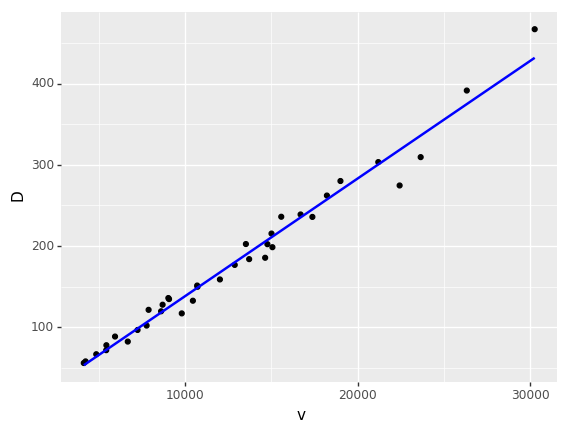

<ggplot: (173341538964)>

In [9]:
(ggplot(hubble) 
 + aes(x='v', y='D') 
 + geom_point()
 + geom_smooth(method='lm', color ='blue', se = False)
)

We can clearly observe the linear relationship of the data.

# 3. Model Creation

In [12]:
X_train = np.array(hubble['v']).reshape(-1, 1)
y_train = np.array(hubble['D']).reshape(-1, 1)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# 4. Create Predictions

In [14]:
hubble['y_pred'] = regressor.predict(X_train)

# 5. Calculate $R^2$

In [17]:
coefficient_of_dermination = r2_score(y_train, hubble['y_pred'])
coefficient_of_dermination

0.9782780292778982

# 6. Bonus: calculate the Hubble Constant: $H_0=\frac{v}{D}$

In [18]:
hubble['H0'] = hubble['v'] / hubble['D']

In [19]:
np.mean(hubble['H0'])

72.21674104824424

You can compare this to most recent observed values, as shown in [this](https://en.wikipedia.org/wiki/Hubble%27s_law) Wikipedia article